In [89]:
import pandas as pd

In [90]:
olympics_df = pd.read_csv("athlete_events.csv")

In [91]:
comparisons = olympics_df[["NOC", "Medal", "Year"]].copy()
comparisons

NOC Medal  Year
0       CHN   NaN  1992
1       CHN   NaN  2012
2       DEN   NaN  1920
3       DEN  Gold  1900
4       NED   NaN  1988
...     ...   ...   ...
271111  POL   NaN  1976
271112  POL   NaN  2014
271113  POL   NaN  2014
271114  POL   NaN  1998
271115  POL   NaN  2002

[271116 rows x 3 columns]

In [92]:
comparisons_swe_fin = comparisons.loc[(comparisons["NOC"]=="SWE") | (comparisons["NOC"]=="FIN")]
comparisons_swe_fin = comparisons_swe_fin.dropna()

(<Figure size 432x288 with 3 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

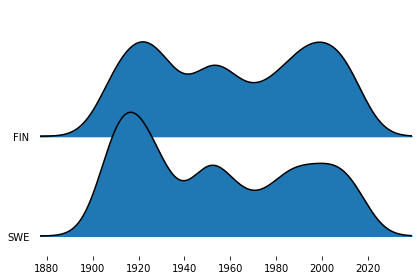

In [93]:
import joypy

joypy.joyplot(comparisons_swe_fin, by="NOC", column = "Year")

In [94]:
import requests

url = "https://www.erikliljeroth.se/api/alldata"

response = requests.get(url)

In [95]:
print(response.json())

[{'dtg': '2020-03-29 23:00:01', 'temperature': 2.99, 'humidity': 44.3, 'sensor_id': 949044086}, {'dtg': '2020-03-29 23:30:02', 'temperature': 2.49, 'humidity': 45.72, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:00:02', 'temperature': 2.43, 'humidity': 45.4, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:30:02', 'temperature': 2.52, 'humidity': 48.45, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:00:02', 'temperature': 2.62, 'humidity': 49.99, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:30:01', 'temperature': 2.79, 'humidity': 49.62, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:00:02', 'temperature': 3.02, 'humidity': 52.07, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:30:02', 'temperature': 3.2, 'humidity': 55.57, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:00:02', 'temperature': 3.38, 'humidity': 59.15, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:30:01', 'temperature': 3.67, 'humidity': 59.89, 'sensor_id': 949044086}, {'dtg': '2020-03-30 04:00:01', 'temperatur

In [96]:
print(response.json()[0]["temperature"])

2.99


In [98]:
temperature_list = []
date_list = []
humidity = []
for info_dict in response.json():
    temperature_list.append(info_dict["temperature"])
    date_list.append(info_dict["dtg"])
    humidity.append(info_dict["humidity"])


print(len(temperature_list), len(date_list), len(humidity))

26064 26064 26064


In [99]:
print(type(temperature_list[0]))

print(set([type(x) for x in temperature_list]))

<class 'float'>
{<class 'int'>, <class 'float'>}


In [100]:
date_list[::48*30]

date_string = '2020-03-29 23:00:01'
date_string.split(" ")[0]

'2020-03-29'

In [102]:
date_list_cleaned = []
for date in date_list:
    cleaned = date.split(" ")[0]
    date_list_cleaned.append(cleaned)

In [103]:
date_list_cleaned = [date.split(" ")[0] for date in date_list]
date_list_cleaned

['2020-03-29',
 '2020-03-29',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-30',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-31',
 '2020-03-

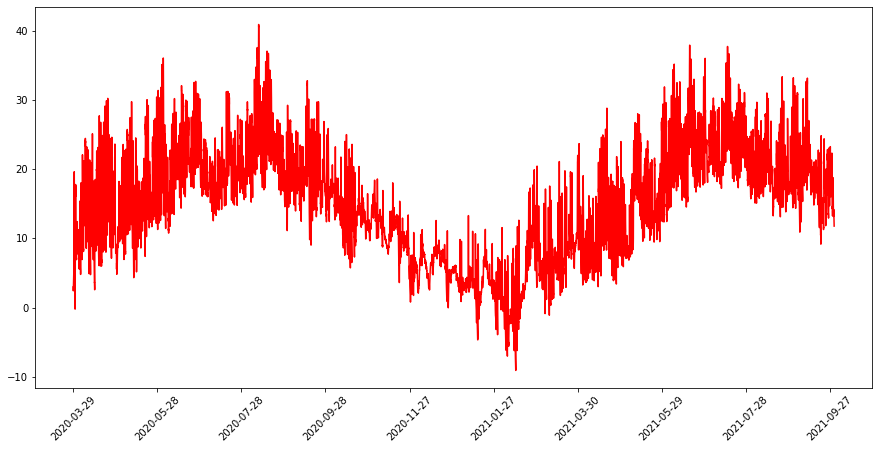

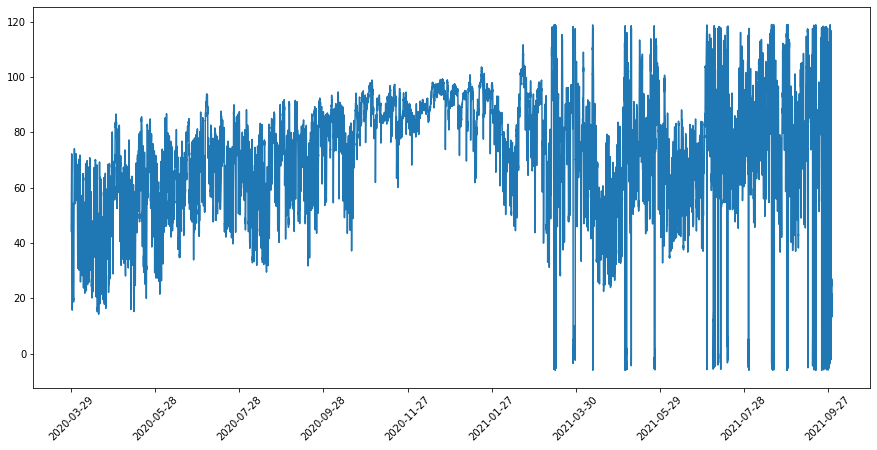

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(temperature_list, color = "red")
plt.xticks(range(len(temperature_list))[::48*30*2], date_list_cleaned[::48*30*2], rotation=45);

plt.figure(figsize=(15,7))
plt.plot(humidity)
plt.xticks(range(len(temperature_list))[::48*30*2], date_list_cleaned[::48*30*2], rotation=45);

In [66]:
with open("cool_data.txt", "w+") as f:
    f.writelines(str(response.json()))

In [84]:
with open("cool_data.txt", "r") as f:
    cool_data = json.load(f)

print(type(cool_data[0]), len(cool_data))

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)

In [77]:
print(cool_data[0])

[{'dtg': '2020-03-29 23:00:01', 'temperature': 2.99, 'humidity': 44.3, 'sensor_id': 949044086}, {'dtg': '2020-03-29 23:30:02', 'temperature': 2.49, 'humidity': 45.72, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:00:02', 'temperature': 2.43, 'humidity': 45.4, 'sensor_id': 949044086}, {'dtg': '2020-03-30 00:30:02', 'temperature': 2.52, 'humidity': 48.45, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:00:02', 'temperature': 2.62, 'humidity': 49.99, 'sensor_id': 949044086}, {'dtg': '2020-03-30 01:30:01', 'temperature': 2.79, 'humidity': 49.62, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:00:02', 'temperature': 3.02, 'humidity': 52.07, 'sensor_id': 949044086}, {'dtg': '2020-03-30 02:30:02', 'temperature': 3.2, 'humidity': 55.57, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:00:02', 'temperature': 3.38, 'humidity': 59.15, 'sensor_id': 949044086}, {'dtg': '2020-03-30 03:30:01', 'temperature': 3.67, 'humidity': 59.89, 'sensor_id': 949044086}, {'dtg': '2020-03-30 04:00:01', 'temperatur

In [80]:
import json

with open("cool_data_2.txt", "w+") as f:
    json.dump(response.json(), f)

In [85]:
with open("cool_data_2.txt", "r") as f:
    cool_data = json.load(f)

print(type(cool_data[0]))

<class 'dict'>


In [87]:
cool_data[0]["temperature"]

2.99